In [1]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import seaborn as sns
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/11 15:48:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/11 15:48:54 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
df = spark.read.csv('./data/Boston.csv', inferSchema=True, header=True)
df.show(5)

#Creating Table
df.registerTempTable('BostonTable')
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from BostonTable").toPandas()
df2 = sqlContext.sql("SELECT AGE, TAX from BostonTable where LSTAT < 2").toPandas()

23/05/11 15:48:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv
 Schema: _c0, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv
Expected: _c0 but found: 
CSV file: file:///workspaces/pyspark1/data/Boston.csv
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|

/usr/local/lib/python3.9/site-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)
/usr/local/lib/python3.9/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


23/05/11 15:48:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv
 Schema: _c0, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv
Expected: _c0 but found: 
CSV file: file:///workspaces/pyspark1/data/Boston.csv


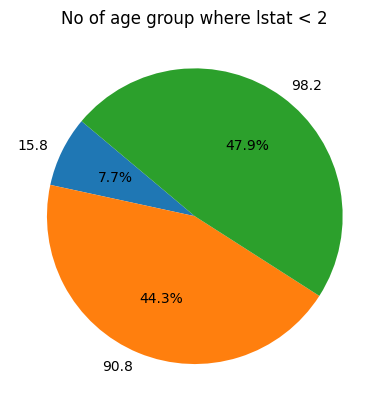

In [3]:
#Creating Visualization
fig = plt.pie(df2['AGE'], autopct='%1.1f%%', startangle=140,labels=df2['AGE'])
plt.title('No of age group where lstat < 2')
plt.show()